<a href="https://colab.research.google.com/github/alexisakov/FederalRevenues/blob/master/HyperbolaParabola.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 	(Very) Technical Brief Geometry of the Fiscal Rule: Hyperbola or Parabola?



In this online appendix we will recreate a key chart from the technical brief: the ratio of MinFin's FX purchases to oil export revenues.

All calculations are done for illustrative purposes - the schematically replicate Russia's oil taxation system for an economy that produces 1 ton of oil and export 0.5 tons. 

## Preliminaries

Import libs.

In [53]:
#This uses the same mechanisms. 
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True)

## Schematic oil taxation

Set various constants and parameters:

In [54]:
baseoilprice = 40; # baseline oil price
oilpj = 60.3; # oil price behind budget parameters // expected oil price  
estUSDRUB = 73; # expected USDRUB
ton2barrel = 7.33 # ton to barrel conversion factor
METBaseRate = 919; 
METKk = 428;
METKkorr = 0.5;

### MET

Mineral extraction tax:

In [5]:
Кц = lambda oilprice, USDRUB :(oilprice - 15) * USDRUB/261

In [6]:
METPart1 = lambda oilprice, USDRUB: METBaseRate* Кц(oilprice, USDRUB)

In [7]:
def ЭП(oilprice):
  if oilprice < 109.5/ton2barrel:
    return 0,
  elif oilprice < 146/ton2barrel:
    return 0.35*(oilprice*ton2barrel - 109.5)
  elif oilprice < 182.5/ton2barrel:
    return 12.78 + 0.45*(oilprice*ton2barrel - 146)
  else:
    return 29.2 + 0.3*(oilprice*ton2barrel - 182.3)

In [8]:
Кман = lambda oilprice, USDRUB : ЭП(oilprice)*USDRUB*METKkorr

In [9]:
Дм = lambda oilprice, USDRUB : METKk - Кман(oilprice, USDRUB)

In [10]:
MET = lambda extractionVolume, oilprice, USDRUB: extractionVolume*(METPart1(oilprice, USDRUB) - Дм(oilprice, USDRUB))

In [11]:
MET(1,70,73)

18397.167279693487

### Export duty

Export duty:

In [12]:
EDKkorr = 0.5;
EDuty = 0.3;

In [13]:
edRate = lambda oilprice, USDRUB : (29.2 + EDuty*(oilprice*ton2barrel - 182.5))*USDRUB*EDKkorr

In [14]:
ED = lambda exportVolume, oilprice, USDRUB : exportVolume*edRate(oilprice, USDRUB)

### Oil taxation under Fiscal rule: Base and Excess Revenues

Total oil budget revenue is a total of MET and ED:

In [15]:
oilgasrevenue = lambda extractionVolume, exportVolume, oilprice, USDRUB : MET(extractionVolume, oilprice, USDRUB) + ED(exportVolume, oilprice, USDRUB)

Now we can define excess revenu (=FX purchases) as follows:

In [18]:
excessrevenue = lambda extractionVolume, exportVolume, oilprice, USDRUB: oilgasrevenue(extractionVolume, exportVolume, oilprice, USDRUB) - oilgasrevenue(
    extractionVolume, exportVolume, baseoilprice, estUSDRUB)

Additionally let us define oil export revenue

In [34]:
exportrevenue = lambda exportVolume, oilprice, USDRUB: exportVolume*oilprice*USDRUB*ton2barrel

## Chart - Relative export revenue neutralization

We attempt to calculate the ration of

*   export revenue in USD
*   to excess oil budget revenue = MinFin's FX purchases

for an economy that 

*   produces 1 ton of oil, 
*   export 0.5 ton of oil 
*   and has a RUB/oil sensitivity of 0.1.

In [26]:
x = list(range(20,150,1))

In [48]:
druboil = 0.1

In [49]:
y = [excessrevenue(1.0, 0.5, oil, 73*(1 - druboil*(oil/oilpj - 1)))/exportrevenue(0.5, oil, 73*(1 - druboil*(oil/oilpj - 1))) for oil in x]

In [35]:
exportrevenue = lambda exportVolume, oilprice, USDRUB: exportVolume*oilprice*USDRUB*ton2barrel

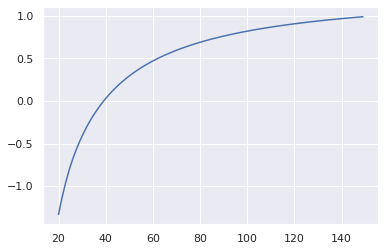

In [52]:
sns.lineplot(x = x, y = y)

So everything checks out - MinFin's FX purchases approach 100% of oil export revenue as oil price approaches USD150/bbl.